# FUNGI

In [4]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [5]:
#import packages
import os
import dokdo
import qiime2 as q2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [6]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [7]:
# import data
denoisetable_fun = q2.Artifact.load('./results/denoisetable_fun.qza')
rep_seqs_fun = q2.Artifact.load('./results/rep_seqs_fun.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

### TREE

In [8]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_fun,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-kq_533k7/8ff2ef41-7ef7-4bbb-8f3b-b3814271ecbd/data/dna-sequences.fasta



inputfile = orig
125 x 274 - 112 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  101 / 125 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  120 / 125
done.

Progressive alignment 1/2... 
STEP    25 / 124 (thread    0)
Reallocating..done. *alloclen = 1549
STEP   124 / 124 (thread    0)
done.

Making a distance matrix from msa.. 
  100 / 125 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  120 / 125
done.

Progressive alignment 2/2... 
STEP    29 / 124 (thread    0)
Reallocating..done. *alloclen = 1549
STEP   124 / 124 (thread    0)
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto inpu

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-8qfm1504/d3656a00-24bd-4212-a8e2-ab955e14bc16/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-8qfm1504/d3656a00-24bd-4212-a8e2-ab955e14bc16/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.05 seconds
Refining topology: 28 rounds ME-NNIs, 2 rounds ME-SPRs, 14 rounds ML-NNIs
      0.15 seconds: SPR round   1 of   2, 101 of 240 nodes
      0.26 seconds: ME NNI round 10 of 28, 1 of 119 splits
      0.42 seconds: SPR round   2 of   2, 201 of 240 nodes
Total branch-length 8.731 after 0.47 sec
      0.52 seconds: ML NNI round 1 of 14, 1 of 119 splits
      0.71 seconds: ML NNI round 1 of 14, 101 of 119 splits, 23 changes (max delta 5.321)
ML-NNI round 1: LogLk = -12546.200 NNIs 28 max delta 5.32 Time 0.75
Switched to using 20 rate categories (CAT approx

### ALPHA AND BETA DIVERSITY

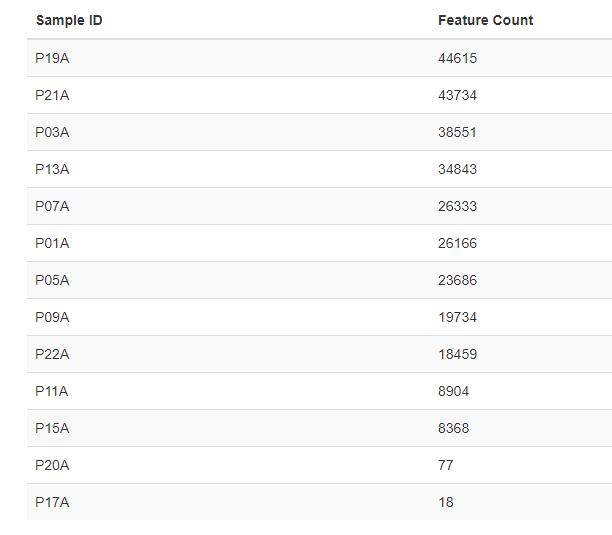

In [9]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_fun,
#     max_depth = 30000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [10]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_30000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_30000.qzv')

In [11]:
q2.Visualization.load('./results/alpha_rarefaction_30000.qzv')

<visualization: Visualization uuid: ccd15cc8-3d5e-4011-a710-4d14696fe15b>

In [12]:
# this step can take some time
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/fun_alpha_rarefaction_plot.png')

### ALPHA DIVERSITY

In [13]:
# set sampling_depth based on alpha rarefacation curve
depth = 8300
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_fun,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-x_gixa8a/47cb135b-5cd1-4bff-a4da-375363f1d371/data/feature-table.biom -t /tmp/qiime2-archive-mnlomhlt/1805be4b-4708-46e1-8b9a-c2eaf12fbc93/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-nya8es8u

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-x_gixa8a/47cb135b-5cd1-4bff-a4da-375363f1d371/data/feature-table.biom -t /tmp/qiime2-archive-mnlomhlt/1805be4b-4708-46e1-8b9a-c2eaf12fbc93/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-hqpdbg0k

Running external command line application. This may print messages to stdout and/

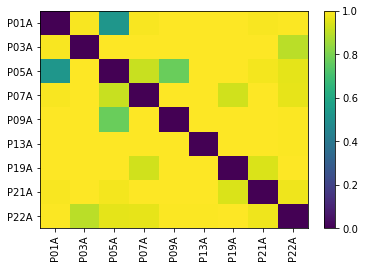

In [14]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

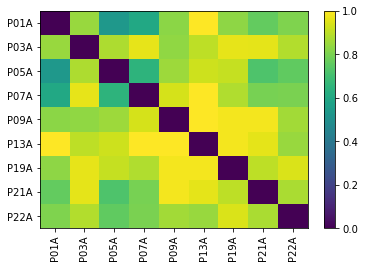

In [15]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [16]:
action_results.jaccard_emperor

<visualization: Visualization uuid: e5f0feae-8432-4859-9e76-5399d9c22b21>

In [17]:
#alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_fun,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
#    steps =  100
#)

In [19]:
#alpha_rarefaction.visualization.save('./results/alpha_diversity.qzv')
alpha_rarefaction = q2.Visualization.load('./results/alpha_diversity.qzv')

In [21]:
alpha_rarefaction

<visualization: Visualization uuid: cf8f40a3-395e-47a0-afeb-8286932a25c4>

In [42]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df = pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson
Sample ID,,,,,
P01A,25.0,3.177279,25.000000,1.155052,0.287341
P03A,5.0,0.516250,5.000000,0.313450,0.095079
P05A,22.0,2.745005,22.500000,2.282192,0.715238
P07A,23.0,2.888081,29.000000,2.355206,0.700177
P09A,8.0,0.873414,8.000000,0.319810,0.082181
P13A,6.0,0.632799,6.000000,0.376814,0.107395
P19A,49.0,6.909205,49.333333,4.790292,0.942882
P21A,44.0,6.096721,45.500000,4.748251,0.954894
P22A,23.0,2.888081,26.000000,2.567280,0.750299


In [43]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [44]:
# simpson viz
visualizations['simpson']

<visualization: Visualization uuid: 914a98df-bd98-4079-8b7f-bf328fb094d4>

In [45]:
# observed_features viz
visualizations['observed_features']

<visualization: Visualization uuid: 46dd978d-faf1-4329-947d-81e82bc1d2f8>

In [46]:
# fisher_alpha viz
visualizations['fisher_alpha']

<visualization: Visualization uuid: 844a1e4a-5ea0-40d6-bce2-2e588c0d4925>

In [47]:
# chao1 viz
visualizations['chao1']

<visualization: Visualization uuid: 0a6ec7cf-ed71-4503-8ebf-51dc40c4c8c2>

In [48]:
# shannon viz
visualizations['shannon']

<visualization: Visualization uuid: 013dd994-b794-4b38-bfc3-ca5a916ef3c5>

In [49]:
# evenness_vector viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.evenness_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 4ebd1fa8-817d-42c8-8199-ab361d048071>

In [50]:
# faith_pd viz
diversity.visualizers.alpha_group_significance(
    alpha_diversity = action_results.faith_pd_vector,
    metadata = sample_metadata
).visualization

<visualization: Visualization uuid: 641e1a48-5ca8-4af8-82d4-14c75eae1562>

### BETA DIVERSITY

In [51]:
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [60]:
# 2016 pade ven
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_fun,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2019')"
)

In [53]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 25000
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-gmcgnvah/021d7ea8-4c66-429f-918c-1fb5f0c93e92/data/feature-table.biom -t /tmp/qiime2-archive-f4w9gf8h/bcfe6e59-7ebc-42c3-8654-bc818a0157e0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-xy80_elj

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-gmcgnvah/021d7ea8-4c66-429f-918c-1fb5f0c93e92/data/feature-table.biom -t /tmp/qiime2-archive-f4w9gf8h/bcfe6e59-7ebc-42c3-8654-bc818a0157e0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-lxdvqmdj

Running external command line application. This may print messages to stdout and/

In [61]:
depth = 25000
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-fjimt5ax/45de5417-629f-4d15-a0cf-a380bb09d0cb/data/feature-table.biom -t /tmp/qiime2-archive-f4w9gf8h/bcfe6e59-7ebc-42c3-8654-bc818a0157e0/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-djo6kh2u

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-fjimt5ax/45de5417-629f-4d15-a0cf-a380bb09d0cb/data/feature-table.biom -t /tmp/qiime2-archive-f4w9gf8h/bcfe6e59-7ebc-42c3-8654-bc818a0157e0/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-2vu8s073

Running external command line application. This may print messages to stdout and/

#### PERMANOVA

In [55]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization

<visualization: Visualization uuid: 19525124-74cf-4696-b7fd-a433b06b6649>

<Figure size 432x288 with 0 Axes>

In [62]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

<visualization: Visualization uuid: 49cdfba4-6c8b-4034-b52b-bd17e43fc850>

<Figure size 432x288 with 0 Axes>

#### ANOSIM

In [64]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: 2e374408-3e19-434c-a713-6362ac754456>

<Figure size 432x288 with 0 Axes>

In [65]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: c7a6667d-f2e5-41b7-8682-b42bbc09a2ec>

<Figure size 432x288 with 0 Axes>